In [14]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Split Train and Test Data

In [15]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

### Let's take a look at one picture of our data

9

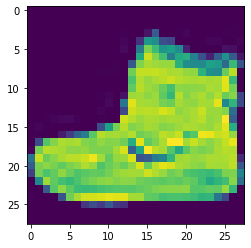

In [25]:
plt.imshow(X_train_full[0])
y_train_full[0]

### [0, 255] is too large to train with the activation functions, so let's rescale them

In [16]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [36]:
X_test = X_test / 255.0

###### check the X_train now

In [28]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00392157,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.17254902, 0.49803922, 0.71372549, 0.7254902 ,
        0.63137255, 0.47058824, 0.21568627, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.16470588,
        0.77647059, 0.98431373, 1.        , 0.98431373, 0.97647059,
        0.96862745, 1.    

In [17]:
class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot",
]

### In Keras, the feed forward nn is called the "sequential network"

In [31]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10),
])

"""
Compiling the model:
To calculate whether the model is doing good or bad
"""
model.compile(optimizer='adam', 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [32]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1719/1719 [==============================] - 2s 976us/step - loss: 0.5066 - accuracy: 0.8222
Epoch 2/10
1719/1719 [==============================] - 2s 937us/step - loss: 0.3806 - accuracy: 0.86350s - loss: 0.386
Epoch 3/10
1719/1719 [==============================] - 2s 959us/step - loss: 0.3416 - accuracy: 0.8747
Epoch 4/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3173 - accuracy: 0.8843
Epoch 5/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2993 - accuracy: 0.8899
Epoch 6/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2844 - accuracy: 0.8937
Epoch 7/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2722 - accuracy: 0.8983: 0s - loss: 0.2727 - accuracy: 
Epoch 8/10
1719/1719 [==============================] - 2s 989us/step - loss: 0.2600 - accuracy: 0.9032
Epoch 9/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2497 - accuracy: 0.9080
Epoch 10/10
1719/1719 [===

In [37]:
model.predict(X_test)[0]

array([-10.084393  ,  -9.072192  ,  -8.029389  ,  -8.914654  ,
       -10.631801  ,  -2.7276967 , -11.982512  ,   0.34933028,
       -10.127287  ,   3.3803031 ], dtype=float32)

In [38]:
y_test[0]

9

In [42]:
np.argmax(model.predict(X_test)[0], axis = -1)

9

In [46]:
x = np.array([[2,4,3], [1,9,3]])
np.argmax(x, axis=-1)

array([1, 1], dtype=int64)